In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,5)
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [105]:
data = pd.read_csv(r"D:\Data Science Assignment Excelr\Timeseries\Timeseries\exchange_rate.csv")

In [107]:
data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [109]:
data.shape

(7588, 2)

In [111]:
data1 = data.sort_index()

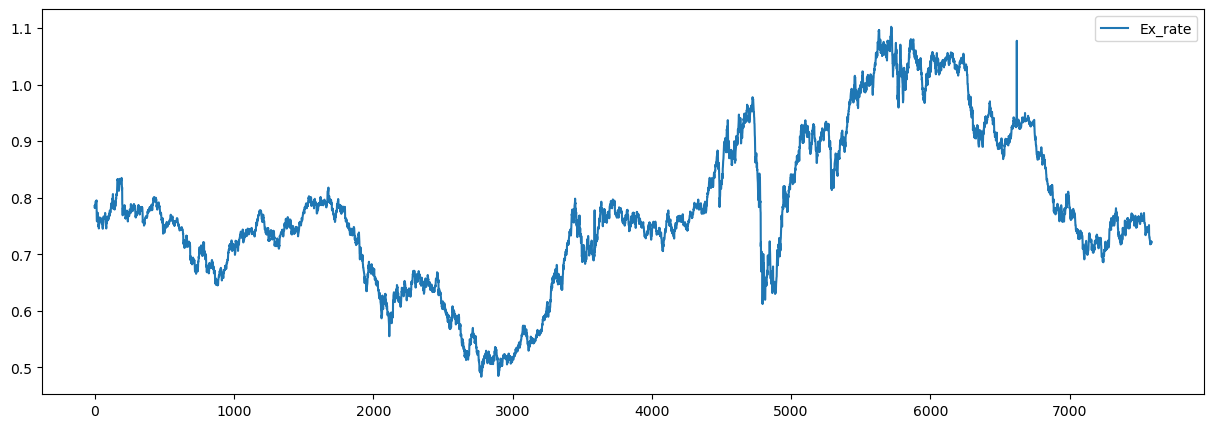

In [113]:
data1.plot();
plt.show()


In [115]:
data.duplicated().sum()

0

In [117]:
data.index.duplicated().sum()

0

In [119]:
data['Ex_rate'].duplicated().sum()

2258

In [121]:
data['Ex_rate_diff'] = data['Ex_rate'].diff().dropna()
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data['Ex_rate_diff'].dropna())
print(f"P-Value after differencing: {adf_result[1]}")


P-Value after differencing: 0.0


In [123]:
adfuller(data['Ex_rate'])[1]

0.44923273535979974

In [125]:
data

,date,Ex_rate,Ex_rate_diff
0,01-01-1990 00:00,0.785500,NaN
1,02-01-1990 00:00,0.781800,-0.003700
2,03-01-1990 00:00,0.786700,0.004900
3,04-01-1990 00:00,0.786000,-0.000700
4,05-01-1990 00:00,0.784900,-0.001100
...,...,...,...
7583,06-10-2010 00:00,0.718494,-0.000207
7584,07-10-2010 00:00,0.721839,0.003345
7585,08-10-2010 00:00,0.723197,0.001358
7586,09-10-2010 00:00,0.720825,-0.002372


In [127]:
data_diff = data['Ex_rate'].diff().dropna()
adfuller(data_diff)[1]

0.0

In [129]:
data

,date,Ex_rate,Ex_rate_diff
0,01-01-1990 00:00,0.785500,NaN
1,02-01-1990 00:00,0.781800,-0.003700
2,03-01-1990 00:00,0.786700,0.004900
3,04-01-1990 00:00,0.786000,-0.000700
4,05-01-1990 00:00,0.784900,-0.001100
...,...,...,...
7583,06-10-2010 00:00,0.718494,-0.000207
7584,07-10-2010 00:00,0.721839,0.003345
7585,08-10-2010 00:00,0.723197,0.001358
7586,09-10-2010 00:00,0.720825,-0.002372


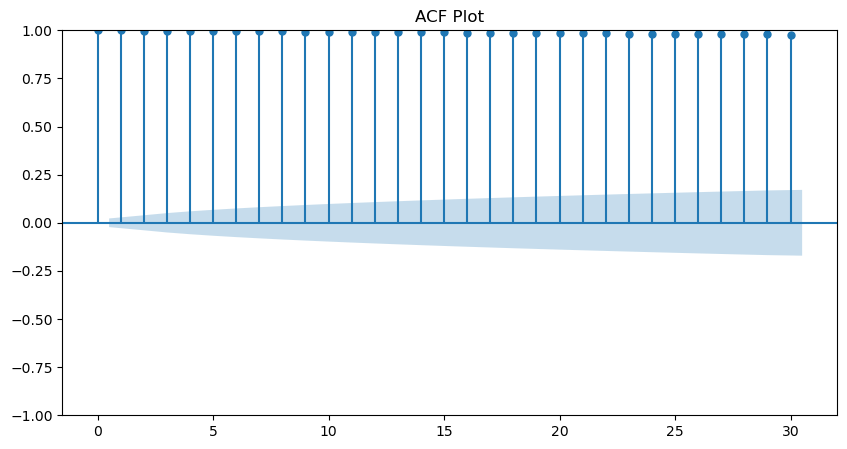

In [131]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(data['Ex_rate'], lags=30, ax=ax)
ax.set_title('ACF Plot')
plt.show()

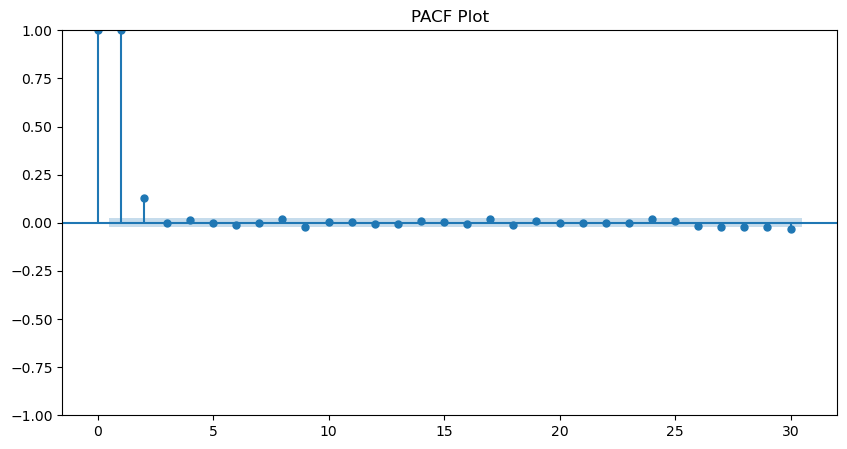

In [133]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(data['Ex_rate'], lags=30, ax=ax)
ax.set_title('PACF Plot')
plt.show()

In [135]:
order = auto_arima(data['Ex_rate'])
order

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [136]:
data.shape

(7588, 3)

In [139]:
train = data.iloc[:-50]
test =  data.iloc[-50:]

In [141]:
train = train.sort_index()
test = test.sort_index()

In [143]:
train.shape,test.shape

((7538, 3), (50, 3))

In [145]:
model = ARIMA(train['Ex_rate'], order = (4,1,5)).fit()

In [147]:
len(test)

50

In [149]:
ypred = model.forecast(steps=len(test))

In [151]:
len(ypred)

50

In [153]:
print(mean_squared_error(test['Ex_rate'], ypred))

0.0004700341387636738


In [155]:
print(np.sqrt(mean_squared_error(test['Ex_rate'], ypred)))

0.021680270726254176


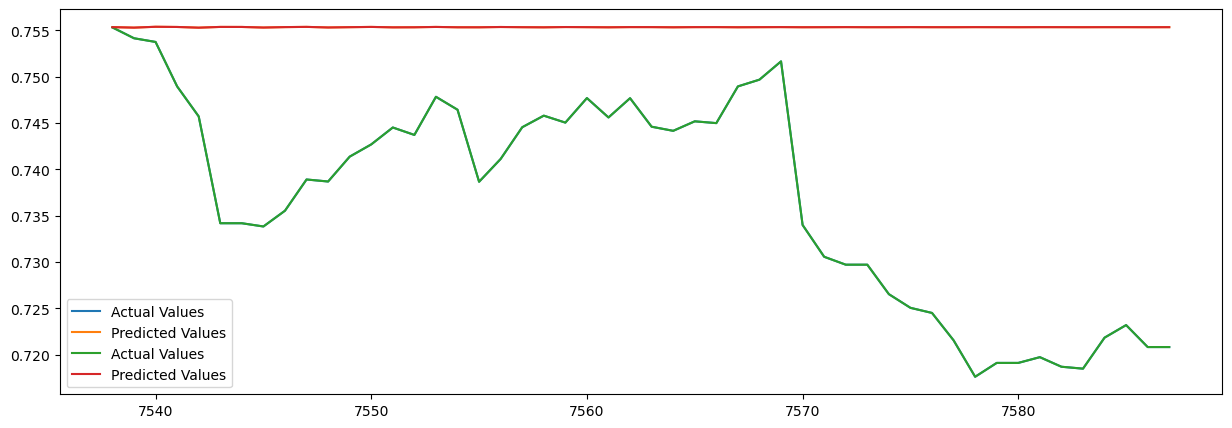

In [163]:
plt.plot(test.index, test['Ex_rate'], label = 'Actual Values')
plt.plot(test.index, ypred, label = 'Predicted Values')
plt.legend()
plt.show()

In [165]:
es = ExponentialSmoothing(train['Ex_rate']).fit()